In [1]:
import pandas as pd
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = alt.Data(
    values = [{"region":"Vinnytsia","year":2014,"investment":138.70},
{"region":"Volyn","year":2014,"investment":260.90},
{"region":"Dnipropetrovsk","year":2014,"investment":1763.00},
{"region":"Donetsk","year":2014,"investment":539.00},
{"region":"Zhytomyr","year":2014,"investment":206.20},
{"region":"Transcarpathian","year":2014,"investment":266.20},
{"region":"Zaporizhia","year":2014,"investment":476.50},
{"region":"Ivano-Frankivsk","year":2014,"investment":671.10},
{"region":"Kyiv","year":2014,"investment":1016.70},
{"region":"Kirovohrad","year":2014,"investment":72.20},
{"region":"Lugansk","year":2014,"investment":259.90},
{"region":"Lviv","year":2014,"investment":435.60},
{"region":"Mykolaiv","year":2014,"investment":196.40},
{"region":"Odesa","year":2014,"investment":596.70},
{"region":"Poltava","year":2014,"investment":718.90},
{"region":"Rivne","year":2014,"investment":209.30},
{"region":"Sumy","year":2014,"investment":233.80},
{"region":"Ternopil","year":2014,"investment":52.20},
{"region":"Kharkiv","year":2014,"investment":615.90},
{"region":"Kherson","year":2014,"investment":194.80},
{"region":"Khmelnytsky","year":2014,"investment":145.30},
{"region":"Cherkasy","year":2014,"investment":409.60},
{"region":"Chernivtsi","year":2014,"investment":75.80},
{"region":"Chernihiv","year":2014,"investment":94.80},
{"region":"Kyiv city","year":2014,"investment":6305.80},
{"region":"Vinnytsia","year":2017,"investment":126.20},
{"region":"Volyn","year":2017,"investment":242.30},
{"region":"Dnipropetrovsk","year":2017,"investment":1142.80},
{"region":"Donetsk","year":2017,"investment":265.20},
{"region":"Zhytomyr","year":2017,"investment":183.40},
{"region":"Transcarpathian","year":2017,"investment":258.90},
{"region":"Zaporizhia","year":2017,"investment":526.20},
{"region":"Ivano-Frankivsk","year":2017,"investment":657.50},
{"region":"Kyiv","year":2017,"investment":913.80},
{"region":"Kirovohrad","year":2017,"investment":73.40},
{"region":"Lugansk","year":2017,"investment":201.20},
{"region":"Lviv","year":2017,"investment":370.00},
{"region":"Mykolaiv","year":2017,"investment":180.00},
{"region":"Odesa","year":2017,"investment":506.60},
{"region":"Poltava","year":2017,"investment":714.20},
{"region":"Rivne","year":2017,"investment":115.60},
{"region":"Sumy","year":2017,"investment":165.50},
{"region":"Ternopil","year":2017,"investment":42.70},
{"region":"Kharkiv","year":2017,"investment":238.00},
{"region":"Kherson","year":2017,"investment":208.10},
{"region":"Khmelnytsky","year":2017,"investment":133.80},
{"region":"Cherkasy","year":2017,"investment":274.70},
{"region":"Chernivtsi","year":2017,"investment":47.10},
{"region":"Chernihiv","year":2017,"investment":421.90},
{"region":"Kyiv city","year":2017,"investment":5657.60}]
    )

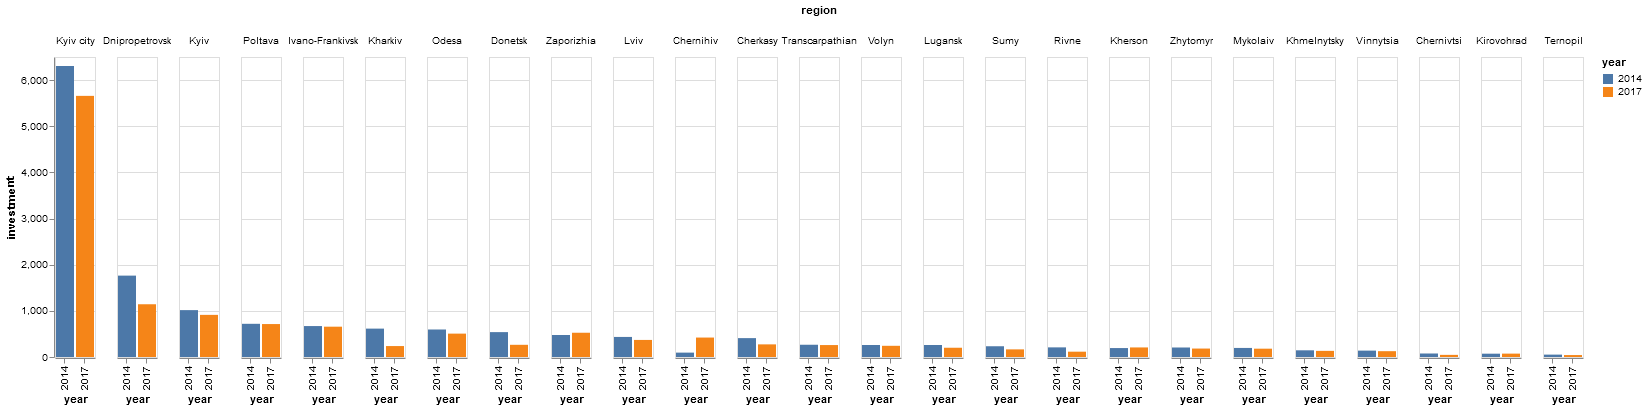

In [3]:
alt.Chart(data).mark_bar().encode(
    x = alt.X('year:N'),
    y = alt.Y('investment:Q'),
    column = alt.Column('region:N', sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    color = alt.Color('year:N')
)

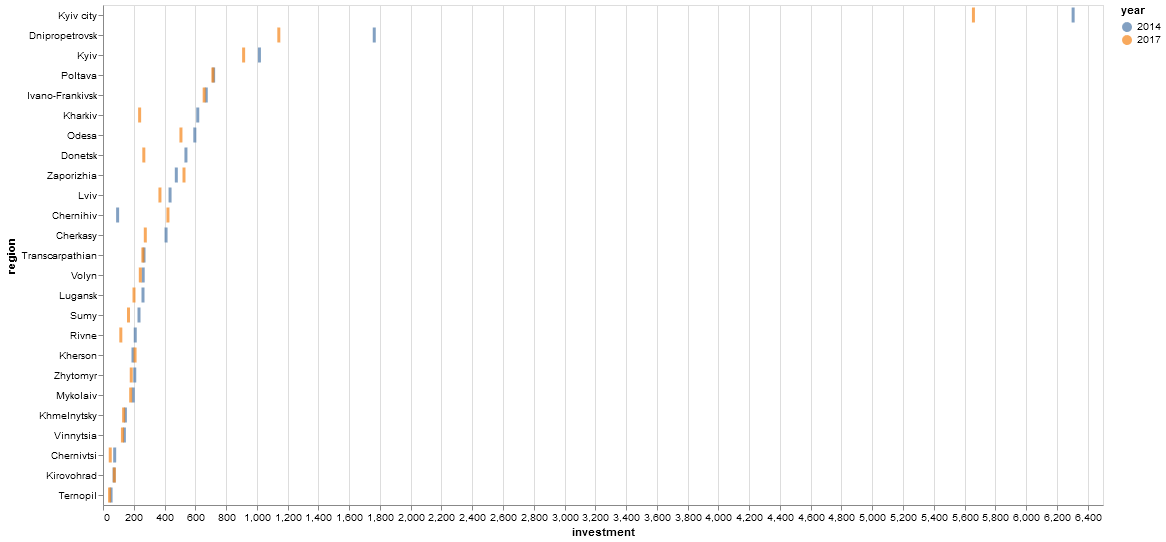

In [4]:
alt.Chart(data).mark_tick(thickness=3).encode(
    y = alt.Y('region:N', sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    x = alt.X('investment:Q'),
    # row = alt.Row('region:N', sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    color = alt.Color('year:N')
).properties(width=1000)

In [17]:
rbase = alt.Chart(data).transform_filter(
    'datum.year == 2017'
)

lbase = alt.Chart(data).transform_filter(
    'datum.year == 2014'
).transform_calculate(investment_inv = 'datum.investment*(-1)')

left_tick = lbase.mark_point(thickness=3).encode(
    y = alt.Y('region:N',  axis=None, sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    x = alt.X('investment_inv:Q', axis=None),
    # row = alt.Row('region:N', sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    color = alt.Color('year:N')
).properties(width=500).transform_filter('datum.year == 2014')

left_txt = lbase.mark_text(xOffset = -22).encode(
   x = alt.X('investment_inv:Q', axis=None),
   y = alt.Y('region:N',  axis=None, sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
   text=alt.Text('investment:Q')
)

middle = rbase.mark_text().encode(
    y=alt.Y('region:N', axis=None, sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    text=alt.Text('region:N'),
).properties(width = 50)

right_tick = rbase.mark_point(thickness=3).encode(
    y = alt.Y('region:N',  axis=None, sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    x = alt.X('investment:Q', axis=None),
    # row = alt.Row('region:N', sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
    color = alt.Color('year:N'),
).properties(width=500).transform_filter('datum.year == 2017')

right_txt = rbase.mark_text(xOffset = 22).encode(
   x = alt.X('investment:Q', axis=None),
   y = alt.Y('region:N',  axis=None, sort = alt.Sort(field='investment', op = 'max', order = 'descending')),
   text=alt.Text('investment:Q')
)

right = right_tick + right_txt
left = left_tick + left_txt

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)